In [1]:
import mysql.connector

In [2]:
import pandas as pd
import numpy as np

In [3]:
conn = mysql.connector.connect(
         user='foouser',
         password='F88Pa%%**',
         host='134.209.144.239',
         database='stocksdb')
print(conn)

In [4]:
cursor = conn.cursor()

cursor.execute("show tables")

In [5]:
for i in cursor:
    print(i)

('interview',)


In [6]:
cursor = conn.cursor()

cursor.execute("select COLUMN_NAME from information_schema.columns where table_name = 'interview' order by ordinal_position" )

In [7]:
names = []
for i in cursor:
    names.append(i)

In [8]:
names

[('isin',),
 ('insertion_datetime',),
 ('datetime',),
 ('open',),
 ('high',),
 ('low',),
 ('close',),
 ('volume',),
 ('open_interest',)]

In [9]:
names = list(map(lambda x :x[0],names))

In [10]:
cursor = conn.cursor()

cursor.execute("select * from interview")

In [11]:
l = []
for i in cursor:
    l.append(i)

In [12]:
sp = pd.DataFrame(l,columns=names)
sp.head()

,isin,insertion_datetime,datetime,open,high,low,close,volume,open_interest
0,INE545A01016,NaT,2018-01-01 09:15:00,2419.0,2436.00,2408.90,2435.25,10281,NaN
1,INE545A01016,NaT,2018-01-01 09:16:00,2435.0,2440.00,2426.45,2439.00,13315,NaN
2,INE545A01016,NaT,2018-01-01 09:17:00,2439.7,2439.70,2422.10,2424.95,3760,NaN
3,INE545A01016,NaT,2018-01-01 09:18:00,2420.0,2424.50,2386.50,2395.00,11653,NaN
4,INE545A01016,NaT,2018-01-01 09:19:00,2395.0,2413.95,2394.70,2409.85,7744,NaN


In [13]:
sp['isin'].unique()

array(['INE545A01016', 'INE265F01028', 'INE221B01012', 'dummy1611',
       'dummy3751', 'dummy3811', 'INE492A01029'], dtype=object)

In [14]:
sp1 = sp[sp['isin'].isin(['INE545A01016', 'INE265F01028', 'INE221B01012', 'INE492A01029'])]

In [15]:
sp1['datetime'] =pd.to_datetime(sp1['datetime'])
sp1.head()

C:\Users\sharath_shady\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,isin,insertion_datetime,datetime,open,high,low,close,volume,open_interest
0,INE545A01016,NaT,2018-01-01 09:15:00,2419.0,2436.00,2408.90,2435.25,10281,NaN
1,INE545A01016,NaT,2018-01-01 09:16:00,2435.0,2440.00,2426.45,2439.00,13315,NaN
2,INE545A01016,NaT,2018-01-01 09:17:00,2439.7,2439.70,2422.10,2424.95,3760,NaN
3,INE545A01016,NaT,2018-01-01 09:18:00,2420.0,2424.50,2386.50,2395.00,11653,NaN
4,INE545A01016,NaT,2018-01-01 09:19:00,2395.0,2413.95,2394.70,2409.85,7744,NaN


In [16]:
sp16 = sp1[sp1['isin'] == 'INE545A01016'][['datetime','close']].set_index('datetime')
sp28 = sp1[sp1['isin'] == 'INE265F01028'][['datetime','close']].set_index('datetime')
sp12 = sp1[sp1['isin'] == 'INE221B01012'][['datetime','close']].set_index('datetime')
sp29 = sp1[sp1['isin'] == 'INE492A01029'][['datetime','close']].set_index('datetime')

In [17]:
sp16.plot()

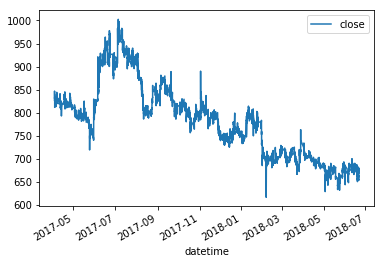

In [18]:
sp28.plot()

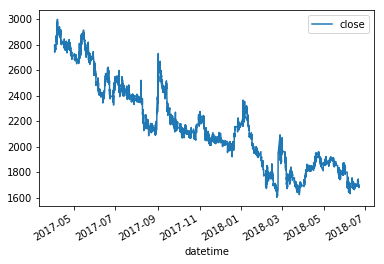

In [19]:
sp12.plot()

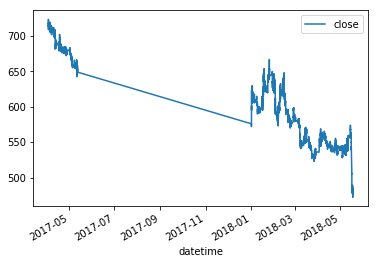

In [20]:
sp29.plot()

In [21]:
sp16 = sp1[sp1['isin'] == 'INE545A01016'][['datetime','close']].set_index('datetime')
sp16.head()

,close
datetime,
2018-01-01 09:15:00,2435.25
2018-01-01 09:16:00,2439.00
2018-01-01 09:17:00,2424.95
2018-01-01 09:18:00,2395.00
2018-01-01 09:19:00,2409.85


In [22]:
sp16.index

DatetimeIndex(['2018-01-01 09:15:00', '2018-01-01 09:16:00',
               '2018-01-01 09:17:00', '2018-01-01 09:18:00',
               '2018-01-01 09:19:00', '2018-01-01 09:20:00',
               '2018-01-01 09:21:00', '2018-01-01 09:22:00',
               '2018-01-01 09:23:00', '2018-01-01 09:24:00',
               ...
               '2018-12-31 15:20:00', '2018-12-31 15:21:00',
               '2018-12-31 15:22:00', '2018-12-31 15:23:00',
               '2018-12-31 15:24:00', '2018-12-31 15:25:00',
               '2018-12-31 15:26:00', '2018-12-31 15:27:00',
               '2018-12-31 15:28:00', '2018-12-31 15:29:00'],
              dtype='datetime64[ns]', name='datetime', length=161138, freq=None)

In [23]:
sp16.shape,sp16.isna().sum()

((161138, 1), close    0
 dtype: int64)

In [24]:
sp16 = sp16.resample('60min').mean()
sp16.bfill(inplace=True)

In [25]:
sp16.head()

,close
datetime,
2017-04-03 09:00:00,223.147778
2017-04-03 10:00:00,223.597500
2017-04-03 11:00:00,224.028333
2017-04-03 12:00:00,224.618333
2017-04-03 13:00:00,224.045000


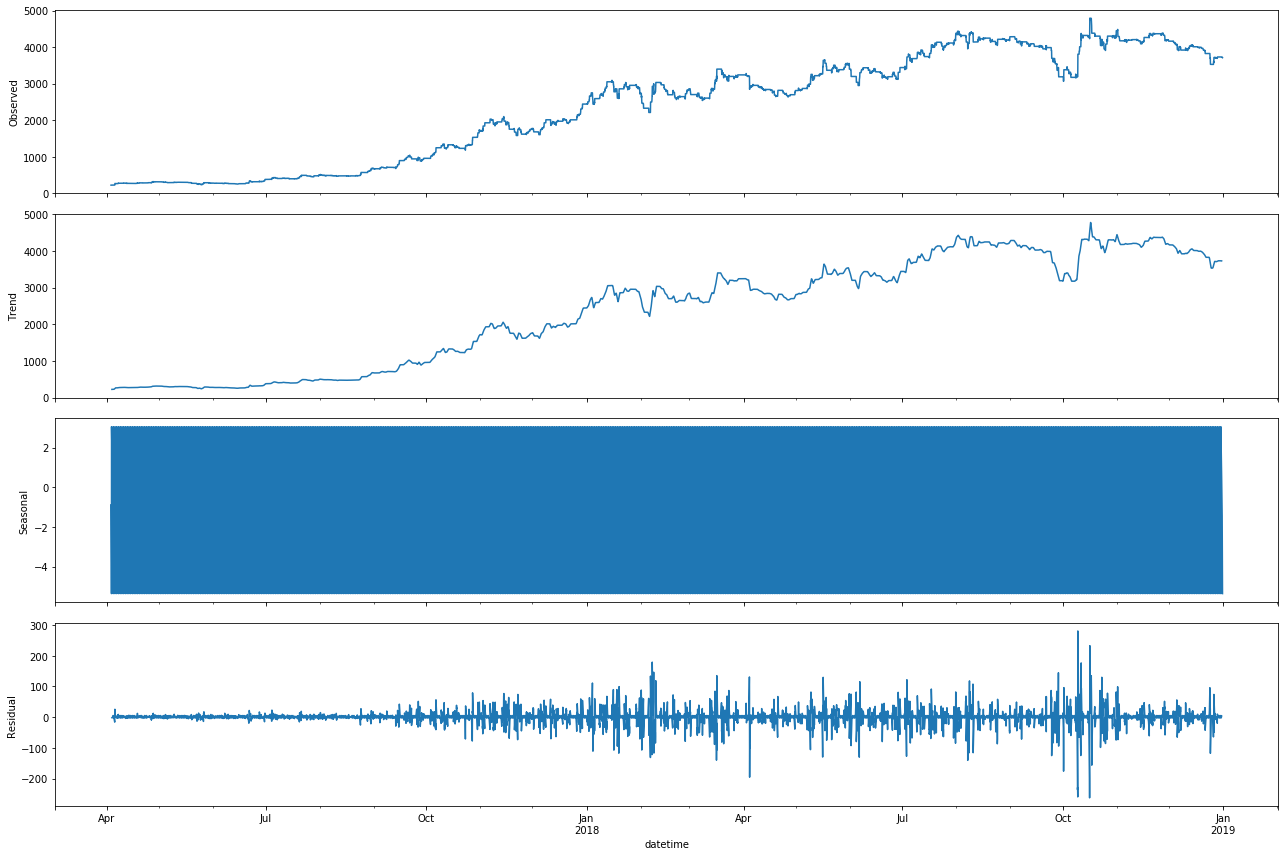

In [26]:
import statsmodels.api as sm
from pylab import rcParams
import matplotlib.pyplot as plt

rcParams['figure.figsize'] = 18, 12
decomposition = sm.tsa.seasonal_decompose(sp16, model='additive')
fig = decomposition.plot()
plt.show()

In [27]:
import warnings
import itertools

p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [28]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(sp16,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

C:\Users\sharath_shady\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\representation.py:375: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return matrix[[slice(None)]*(matrix.ndim-1) + [0]]


ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:286025.46379520703
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:265175.1125555134
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:168267.94380913198
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:168099.13257193295
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:168272.56144270414
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:168215.32747961674
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:168108.51165263788
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:168100.3652210264
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:264948.195277052
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:244320.11206908617
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:152986.20349170038
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:152822.48664235295
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:153002.8731910414


C:\Users\sharath_shady\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:155906.4143849142
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:152839.73716356902
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:152800.91537728533
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:125676.30591562082
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:125591.6826992167
ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:136181.17071382207
ARIMA(0, 1, 0)x(0, 1, 1, 12)12 - AIC:125467.54491488423
ARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:125598.90121666962
ARIMA(0, 1, 0)x(1, 0, 1, 12)12 - AIC:125552.44754035916
ARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:130729.16656283679
ARIMA(0, 1, 0)x(1, 1, 1, 12)12 - AIC:125469.02817031552
ARIMA(0, 1, 1)x(0, 0, 0, 12)12 - AIC:125512.39829294829
ARIMA(0, 1, 1)x(0, 0, 1, 12)12 - AIC:125427.90196025465
ARIMA(0, 1, 1)x(0, 1, 0, 12)12 - AIC:136016.68961731845
ARIMA(0, 1, 1)x(0, 1, 1, 12)12 - AIC:125297.86557364248
ARIMA(0, 1, 1)x(1, 0, 0, 12)12 - AIC:125442.3172782769
ARIMA(0, 1, 1)x(1, 0, 1, 12)12 - AIC:125381.30428444341
ARIMA(0, 1, 1)x(1, 1, 0, 12)12 - AIC:130484.3305821

C:\Users\sharath_shady\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 0)x(0, 0, 1, 12)12 - AIC:125691.25481644402


C:\Users\sharath_shady\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 0)x(0, 1, 0, 12)12 - AIC:135715.56427527673
ARIMA(1, 0, 0)x(0, 1, 1, 12)12 - AIC:125475.87477062272
ARIMA(1, 0, 0)x(1, 0, 0, 12)12 - AIC:125603.45080926041
ARIMA(1, 0, 0)x(1, 0, 1, 12)12 - AIC:125562.67904975188
ARIMA(1, 0, 0)x(1, 1, 0, 12)12 - AIC:130486.52640445597
ARIMA(1, 0, 1)x(0, 0, 0, 12)12 - AIC:125520.85656670947


C:\Users\sharath_shady\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 1)x(0, 0, 1, 12)12 - AIC:125826.80191296386
ARIMA(1, 0, 1)x(0, 1, 0, 12)12 - AIC:135444.8286428764
ARIMA(1, 0, 1)x(0, 1, 1, 12)12 - AIC:125306.10046208023
ARIMA(1, 0, 1)x(1, 0, 0, 12)12 - AIC:125447.09964111676
ARIMA(1, 0, 1)x(1, 0, 1, 12)12 - AIC:125393.92171448906
ARIMA(1, 0, 1)x(1, 1, 0, 12)12 - AIC:130179.4965229083
ARIMA(1, 0, 1)x(1, 1, 1, 12)12 - AIC:125307.54770028564
ARIMA(1, 1, 0)x(0, 0, 0, 12)12 - AIC:125518.04238351954
ARIMA(1, 1, 0)x(0, 0, 1, 12)12 - AIC:125433.54953883943
ARIMA(1, 1, 0)x(0, 1, 0, 12)12 - AIC:136023.0310877919
ARIMA(1, 1, 0)x(0, 1, 1, 12)12 - AIC:125304.0070825298
ARIMA(1, 1, 0)x(1, 0, 0, 12)12 - AIC:125433.5449803122
ARIMA(1, 1, 0)x(1, 0, 1, 12)12 - AIC:125387.25591866359
ARIMA(1, 1, 0)x(1, 1, 0, 12)12 - AIC:130472.06296308104
ARIMA(1, 1, 0)x(1, 1, 1, 12)12 - AIC:125305.39857853405
ARIMA(1, 1, 1)x(0, 0, 0, 12)12 - AIC:125512.72936176989
ARIMA(1, 1, 1)x(0, 0, 1, 12)12 - AIC:125428.2348943712
ARIMA(1, 1, 1)x(0, 1, 0, 12)12 - AIC:136017.0251475796

In [29]:
mod = sm.tsa.statespace.SARIMAX(sp16,
                                order=(1, 1, 1),
                                seasonal_order=(0, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1239      0.036      3.482      0.000       0.054       0.194
ma.L1         -0.0202      0.035     -0.577      0.564      -0.089       0.048
ma.S.L12      -0.9983      0.000  -2309.591      0.000      -0.999      -0.997
sigma2       213.6412      0.231    923.448      0.000     213.188     214.095


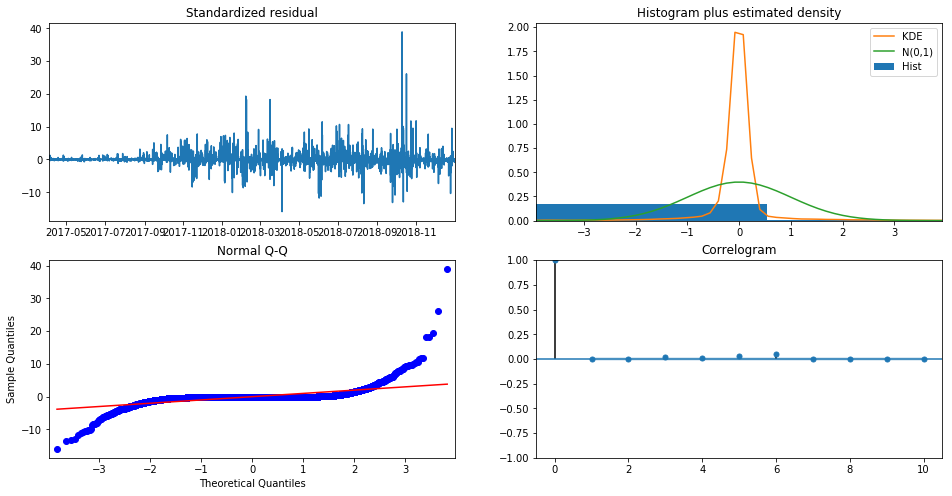

In [30]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

In [92]:
sp16.head()

,close
datetime,
2017-04-03 09:00:00,223.147778
2017-04-03 10:00:00,223.597500
2017-04-03 11:00:00,224.028333
2017-04-03 12:00:00,224.618333
2017-04-03 13:00:00,224.045000


In [33]:
sp16.tail(100)

,close
datetime,
2018-12-27 12:00:00,3706.837500
2018-12-27 13:00:00,3703.183333
2018-12-27 14:00:00,3700.210000
2018-12-27 15:00:00,3695.963333
2018-12-27 16:00:00,3706.113333
2018-12-27 17:00:00,3706.113333
2018-12-27 18:00:00,3706.113333
2018-12-27 19:00:00,3706.113333
2018-12-27 20:00:00,3706.113333


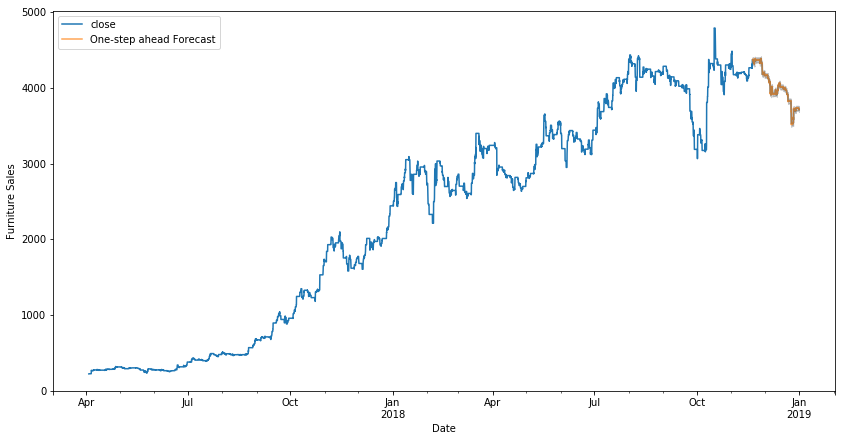

In [32]:
pred = results.get_prediction(start=pd.to_datetime('2018-11-20 00:00:00'), dynamic=False)
pred_ci = pred.conf_int()


ax = sp16['2017':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
plt.legend()
plt.show()

In [52]:
sp28 = sp1[sp1['isin'] == 'INE265F01028'][['datetime','close']].set_index('datetime')
sp28.head()

,close
datetime,
2017-04-03 09:19:00,831.0
2017-04-03 09:20:00,831.0
2017-04-03 09:21:00,836.0
2017-04-03 09:22:00,836.0
2017-04-03 09:23:00,836.0


In [53]:
sp28 = sp28.resample('60min').mean()
sp28.bfill(inplace=True)
sp28.ffill(inplace=True)

In [54]:
sp28.index

DatetimeIndex(['2017-04-03 09:00:00', '2017-04-03 10:00:00',
               '2017-04-03 11:00:00', '2017-04-03 12:00:00',
               '2017-04-03 13:00:00', '2017-04-03 14:00:00',
               '2017-04-03 15:00:00', '2017-04-03 16:00:00',
               '2017-04-03 17:00:00', '2017-04-03 18:00:00',
               ...
               '2018-06-21 06:00:00', '2018-06-21 07:00:00',
               '2018-06-21 08:00:00', '2018-06-21 09:00:00',
               '2018-06-21 10:00:00', '2018-06-21 11:00:00',
               '2018-06-21 12:00:00', '2018-06-21 13:00:00',
               '2018-06-21 14:00:00', '2018-06-21 15:00:00'],
              dtype='datetime64[ns]', name='datetime', length=10663, freq='60T')

In [55]:
sp28.shape,sp16.isna().sum()

((10663, 1), close    0
 dtype: int64)

In [56]:
sp28.head()

,close
datetime,
2017-04-03 09:00:00,839.104878
2017-04-03 10:00:00,836.558333
2017-04-03 11:00:00,834.549167
2017-04-03 12:00:00,829.533333
2017-04-03 13:00:00,827.619167


In [67]:
sp28.tail()

,close
datetime,
2018-06-21 11:00:00,655.401667
2018-06-21 12:00:00,660.349167
2018-06-21 13:00:00,660.064167
2018-06-21 14:00:00,664.135833
2018-06-21 15:00:00,671.571667


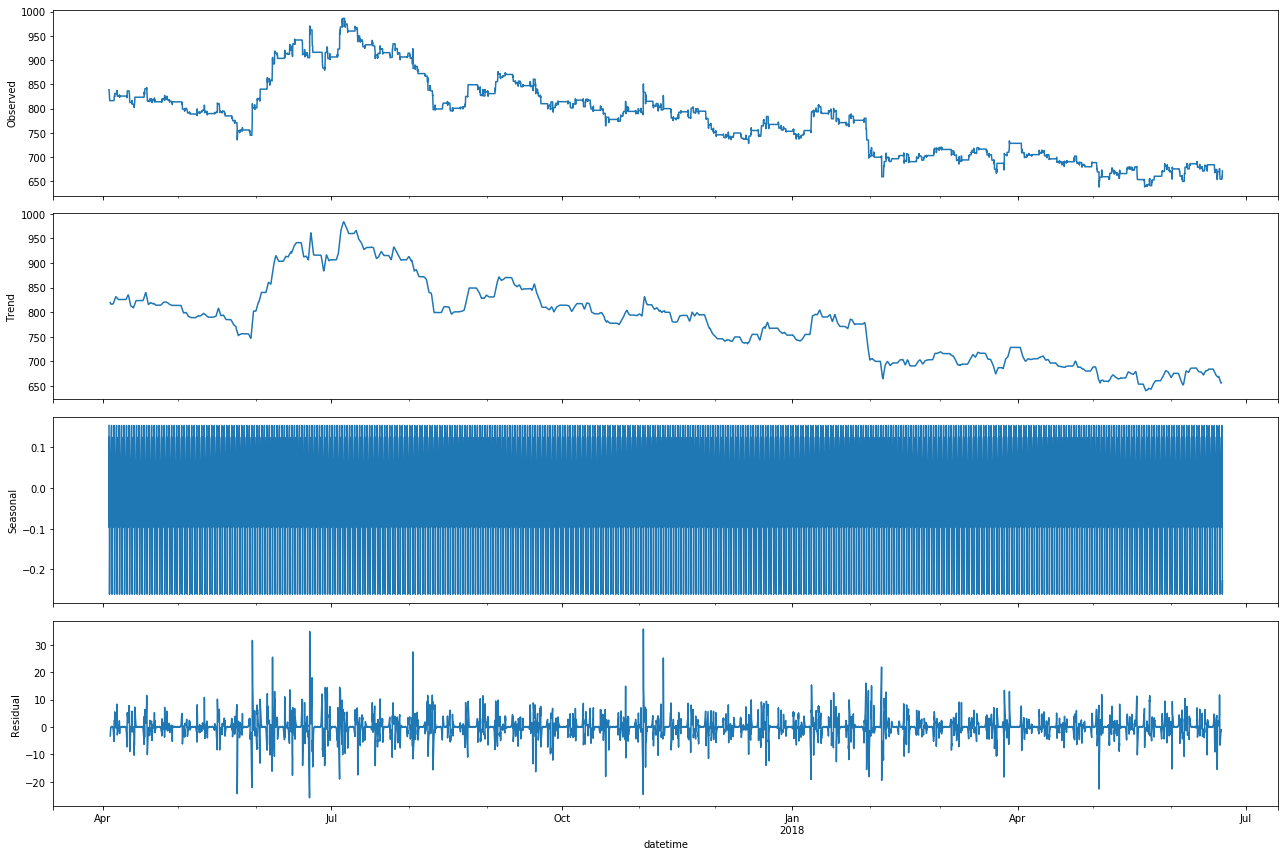

In [57]:
import statsmodels.api as sm
from pylab import rcParams
import matplotlib.pyplot as plt

rcParams['figure.figsize'] = 18, 12
decomposition = sm.tsa.seasonal_decompose(sp28, model='additive')
fig = decomposition.plot()
plt.show()

In [58]:
import warnings
import itertools

p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [59]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(sp28,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

C:\Users\sharath_shady\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\representation.py:375: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return matrix[[slice(None)]*(matrix.ndim-1) + [0]]


ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:172384.98485583597
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:157598.68454965524
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:74705.59682878164
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:74608.53639946193
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:74713.6297554994
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:74691.17932041785
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:74616.11250235875
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:74597.83186647802
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:164391.61559641862
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:142962.98794519925
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:65120.28335596109
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:64803.373765995915
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:65140.66526566932


C:\Users\sharath_shady\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:65402.2460793931
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:64849.45556053512
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:64782.8692768118
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:48789.513755851134
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:48733.559078870734
ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:56111.86064762058
ARIMA(0, 1, 0)x(0, 1, 1, 12)12 - AIC:48757.4819112039
ARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:48737.13500669511
ARIMA(0, 1, 0)x(1, 0, 1, 12)12 - AIC:48735.55909982012
ARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:53007.36561815341
ARIMA(0, 1, 0)x(1, 1, 1, 12)12 - AIC:48758.04691995155
ARIMA(0, 1, 1)x(0, 0, 0, 12)12 - AIC:48757.53748782401
ARIMA(0, 1, 1)x(0, 0, 1, 12)12 - AIC:48703.36082739965
ARIMA(0, 1, 1)x(0, 1, 0, 12)12 - AIC:56080.36890684557
ARIMA(0, 1, 1)x(0, 1, 1, 12)12 - AIC:48725.62401238225
ARIMA(0, 1, 1)x(1, 0, 0, 12)12 - AIC:48710.50742913312
ARIMA(0, 1, 1)x(1, 0, 1, 12)12 - AIC:48705.36083748159
ARIMA(0, 1, 1)x(1, 1, 0, 12)12 - AIC:52972.383506643324
ARIMA(0, 1

C:\Users\sharath_shady\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 0)x(0, 0, 0, 12)12 - AIC:48795.57081886012


C:\Users\sharath_shady\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 0)x(0, 0, 1, 12)12 - AIC:48772.12451904777


C:\Users\sharath_shady\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 0)x(0, 1, 0, 12)12 - AIC:55641.804450195355
ARIMA(1, 0, 0)x(0, 1, 1, 12)12 - AIC:48760.03573917603
ARIMA(1, 0, 0)x(1, 0, 0, 12)12 - AIC:48738.651775867416
ARIMA(1, 0, 0)x(1, 0, 1, 12)12 - AIC:48746.4134809074
ARIMA(1, 0, 0)x(1, 1, 0, 12)12 - AIC:52719.496597909994
ARIMA(1, 0, 0)x(1, 1, 1, 12)12 - AIC:48763.505328033105
ARIMA(1, 0, 1)x(0, 0, 0, 12)12 - AIC:48763.28728392085
ARIMA(1, 0, 1)x(0, 0, 1, 12)12 - AIC:48743.99896083231
ARIMA(1, 0, 1)x(0, 1, 0, 12)12 - AIC:55538.921098254985
ARIMA(1, 0, 1)x(0, 1, 1, 12)12 - AIC:48727.55275821389
ARIMA(1, 0, 1)x(1, 0, 0, 12)12 - AIC:48712.05398983383
ARIMA(1, 0, 1)x(1, 0, 1, 12)12 - AIC:48729.28032383349
ARIMA(1, 0, 1)x(1, 1, 0, 12)12 - AIC:52641.22946294042
ARIMA(1, 0, 1)x(1, 1, 1, 12)12 - AIC:48730.73080622163
ARIMA(1, 1, 0)x(0, 0, 0, 12)12 - AIC:48764.4831857938
ARIMA(1, 1, 0)x(0, 0, 1, 12)12 - AIC:48709.62695695969
ARIMA(1, 1, 0)x(0, 1, 0, 12)12 - AIC:56087.64459006628
ARIMA(1, 1, 0)x(0, 1, 1, 12)12 - AIC:48732.42934772758
ARIMA(1

In [99]:
mod = sm.tsa.statespace.SARIMAX(sp28,
                                order=(1, 1, 1),
                                seasonal_order=(0, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3851      0.065     -5.916      0.000      -0.513      -0.257
ma.L1          0.4425      0.064      6.867      0.000       0.316       0.569
ma.S.L12      -1.0036      0.001  -1028.292      0.000      -1.006      -1.002
sigma2         5.6391      0.015    375.747      0.000       5.610       5.668


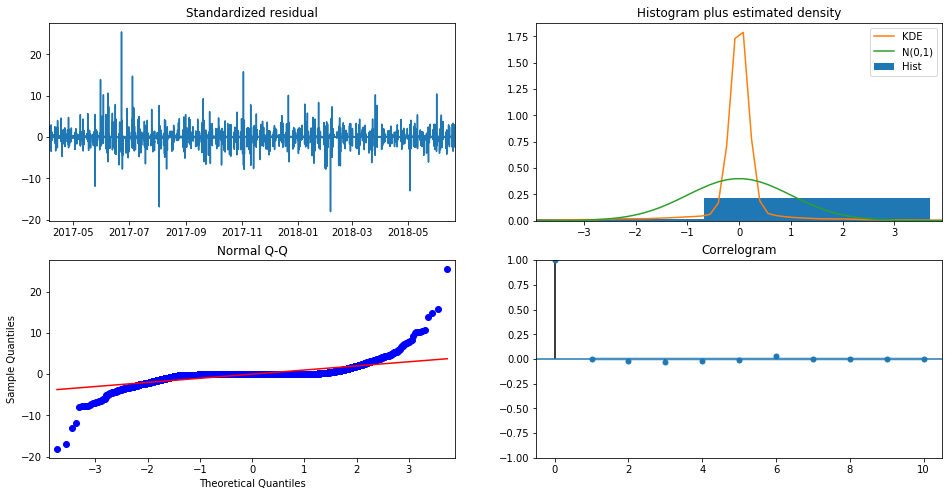

In [100]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

In [101]:
sp28.tail(50)

,close
datetime,
2018-06-19 14:00:00,656.360833
2018-06-19 15:00:00,662.026667
2018-06-19 16:00:00,670.000000
2018-06-19 17:00:00,670.000000
2018-06-19 18:00:00,670.000000
2018-06-19 19:00:00,670.000000
2018-06-19 20:00:00,670.000000
2018-06-19 21:00:00,670.000000
2018-06-19 22:00:00,670.000000


In [102]:
sp28.head()

,close
datetime,
2017-04-03 09:00:00,839.104878
2017-04-03 10:00:00,836.558333
2017-04-03 11:00:00,834.549167
2017-04-03 12:00:00,829.533333
2017-04-03 13:00:00,827.619167


In [103]:
# pred = results.get_prediction(start=pd.to_datetime('2018-11-20 00:00:00'), dynamic=False)
# pred_ci = pred.conf_int()


# ax = sp16['2017':].plot(label='observed')
# pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
# ax.fill_between(pred_ci.index,
#                 pred_ci.iloc[:, 0],
#                 pred_ci.iloc[:, 1], color='k', alpha=.2)
# ax.set_xlabel('Date')
# ax.set_ylabel('Furniture Sales')
# plt.legend()
# plt.show()

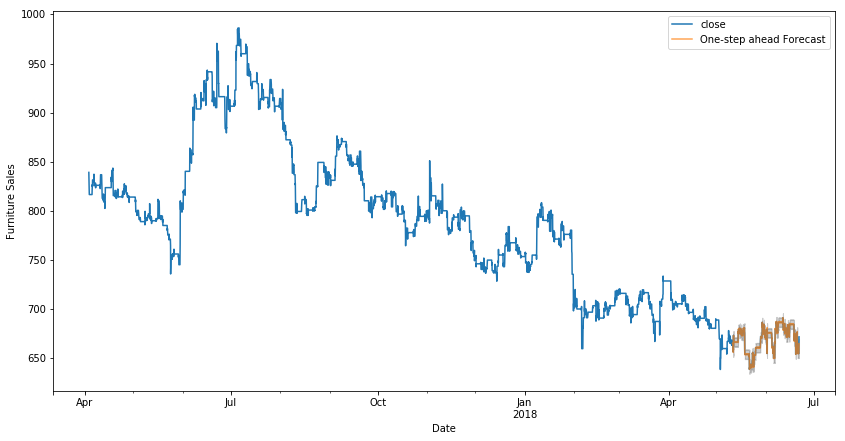

In [106]:
pred = results.get_prediction(start=pd.to_datetime('2018-05-11 00:00:00'), dynamic=False)
pred_ci = pred.conf_int()


ax = sp28['2017':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('closing price')
plt.legend()
plt.show()

In [110]:
sp12 = sp1[sp1['isin'] == 'INE221B01012'][['datetime','close']].set_index('datetime')

In [111]:
sp12 = sp12.resample('60min').mean()
sp12.bfill(inplace=True)

In [112]:
sp12.index

DatetimeIndex(['2017-04-03 09:00:00', '2017-04-03 10:00:00',
               '2017-04-03 11:00:00', '2017-04-03 12:00:00',
               '2017-04-03 13:00:00', '2017-04-03 14:00:00',
               '2017-04-03 15:00:00', '2017-04-03 16:00:00',
               '2017-04-03 17:00:00', '2017-04-03 18:00:00',
               ...
               '2018-06-21 06:00:00', '2018-06-21 07:00:00',
               '2018-06-21 08:00:00', '2018-06-21 09:00:00',
               '2018-06-21 10:00:00', '2018-06-21 11:00:00',
               '2018-06-21 12:00:00', '2018-06-21 13:00:00',
               '2018-06-21 14:00:00', '2018-06-21 15:00:00'],
              dtype='datetime64[ns]', name='datetime', length=10663, freq='60T')

In [113]:
sp12.shape,sp16.isna().sum()

((10663, 1), close    0
 dtype: int64)

In [114]:
sp12.head()

,close
datetime,
2017-04-03 09:00:00,2758.576829
2017-04-03 10:00:00,2778.326667
2017-04-03 11:00:00,2781.964167
2017-04-03 12:00:00,2769.703333
2017-04-03 13:00:00,2760.916667


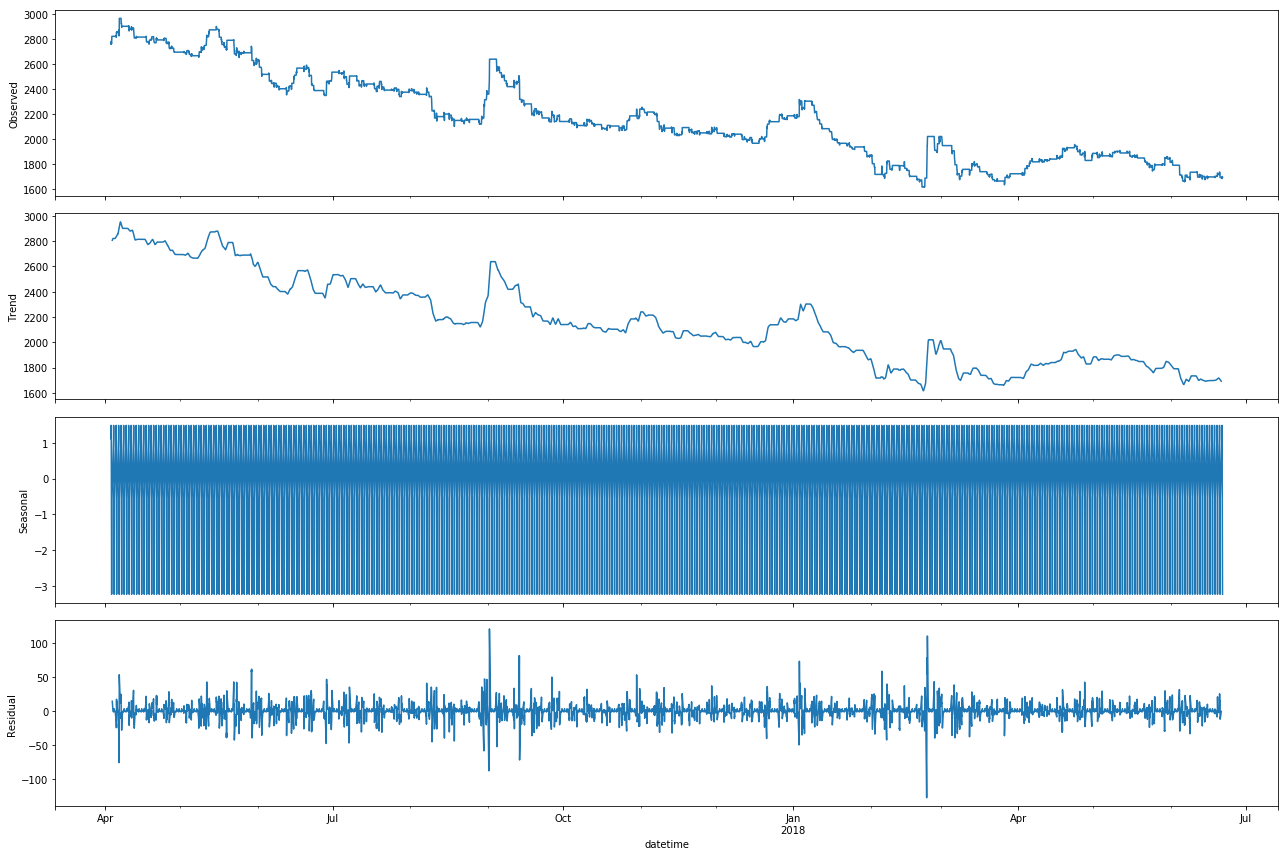

In [115]:
import statsmodels.api as sm
from pylab import rcParams
import matplotlib.pyplot as plt

rcParams['figure.figsize'] = 18, 12
decomposition = sm.tsa.seasonal_decompose(sp12, model='additive')
fig = decomposition.plot()
plt.show()

In [116]:
import warnings
import itertools

p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [85]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(sp12,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

C:\Users\sharath_shady\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\representation.py:375: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return matrix[[slice(None)]*(matrix.ndim-1) + [0]]


ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:194268.91314386457
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:186127.61987065943
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:100470.04144675015
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:100331.7515523136
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:100455.9122020482
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:100428.15664258962
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:100337.23048845725
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:100290.34544002391
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:186269.75608235583
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:164820.23398102896
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:90036.61249574619
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:89884.6975482572
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:90038.26987934149


C:\Users\sharath_shady\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:90305.8857312584
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:89896.2340667937
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:89870.84986455814
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:71595.43272887569
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:71458.11001023388
ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:78870.19725064147
ARIMA(0, 1, 0)x(0, 1, 1, 12)12 - AIC:71435.0010576551
ARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:71463.81989912076
ARIMA(0, 1, 0)x(1, 0, 1, 12)12 - AIC:71460.11013990041
ARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:75503.9651703758
ARIMA(0, 1, 0)x(1, 1, 1, 12)12 - AIC:71415.47801532502
ARIMA(0, 1, 1)x(0, 0, 0, 12)12 - AIC:71466.46089577334
ARIMA(0, 1, 1)x(0, 0, 1, 12)12 - AIC:71327.760952833
ARIMA(0, 1, 1)x(0, 1, 0, 12)12 - AIC:78739.74765961137
ARIMA(0, 1, 1)x(0, 1, 1, 12)12 - AIC:71305.36407159964
ARIMA(0, 1, 1)x(1, 0, 0, 12)12 - AIC:71339.15704648498
ARIMA(0, 1, 1)x(1, 0, 1, 12)12 - AIC:71329.76108646476
ARIMA(0, 1, 1)x(1, 1, 0, 12)12 - AIC:75397.05927932367
ARIMA(0, 1, 1)x(

C:\Users\sharath_shady\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 0)x(0, 0, 1, 12)12 - AIC:71490.88889914405


C:\Users\sharath_shady\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 0)x(0, 1, 0, 12)12 - AIC:78523.44545619877
ARIMA(1, 0, 0)x(0, 1, 1, 12)12 - AIC:71442.70321975937
ARIMA(1, 0, 0)x(1, 0, 0, 12)12 - AIC:71462.62668109204
ARIMA(1, 0, 0)x(1, 0, 1, 12)12 - AIC:71557.58975099624
ARIMA(1, 0, 0)x(1, 1, 0, 12)12 - AIC:75306.40298767833
ARIMA(1, 0, 0)x(1, 1, 1, 12)12 - AIC:71426.4492288812


C:\Users\sharath_shady\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 1)x(0, 0, 0, 12)12 - AIC:71471.9507536103


C:\Users\sharath_shady\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 1)x(0, 0, 1, 12)12 - AIC:71388.14438801864
ARIMA(1, 0, 1)x(0, 1, 0, 12)12 - AIC:78304.6792264673
ARIMA(1, 0, 1)x(0, 1, 1, 12)12 - AIC:71311.40495637734
ARIMA(1, 0, 1)x(1, 0, 0, 12)12 - AIC:71338.44166270859
ARIMA(1, 0, 1)x(1, 0, 1, 12)12 - AIC:71354.90213404737
ARIMA(1, 0, 1)x(1, 1, 0, 12)12 - AIC:75155.7739511549
ARIMA(1, 0, 1)x(1, 1, 1, 12)12 - AIC:71295.20307432715
ARIMA(1, 1, 0)x(0, 0, 0, 12)12 - AIC:71474.52223697487
ARIMA(1, 1, 0)x(0, 0, 1, 12)12 - AIC:71335.93794358392
ARIMA(1, 1, 0)x(0, 1, 0, 12)12 - AIC:78748.57700753068
ARIMA(1, 1, 0)x(0, 1, 1, 12)12 - AIC:71313.55050952984
ARIMA(1, 1, 0)x(1, 0, 0, 12)12 - AIC:71335.93803752268
ARIMA(1, 1, 0)x(1, 0, 1, 12)12 - AIC:71337.93806830993
ARIMA(1, 1, 0)x(1, 1, 0, 12)12 - AIC:75391.89813683362
ARIMA(1, 1, 0)x(1, 1, 1, 12)12 - AIC:71291.64552977114
ARIMA(1, 1, 1)x(0, 0, 0, 12)12 - AIC:71468.36197994702
ARIMA(1, 1, 1)x(0, 0, 1, 12)12 - AIC:71329.57435494837
ARIMA(1, 1, 1)x(0, 1, 0, 12)12 - AIC:78741.58331114543
ARIMA(1, 1, 

In [117]:
mod = sm.tsa.statespace.SARIMAX(sp12,
                                order=(1, 1, 1),
                                seasonal_order=(0, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0265      0.043     -0.615      0.539      -0.111       0.058
ma.L1          0.1345      0.044      3.091      0.002       0.049       0.220
ma.S.L12      -1.0000      0.492     -2.033      0.042      -1.964      -0.036
sigma2        47.4111     23.338      2.032      0.042       1.670      93.152


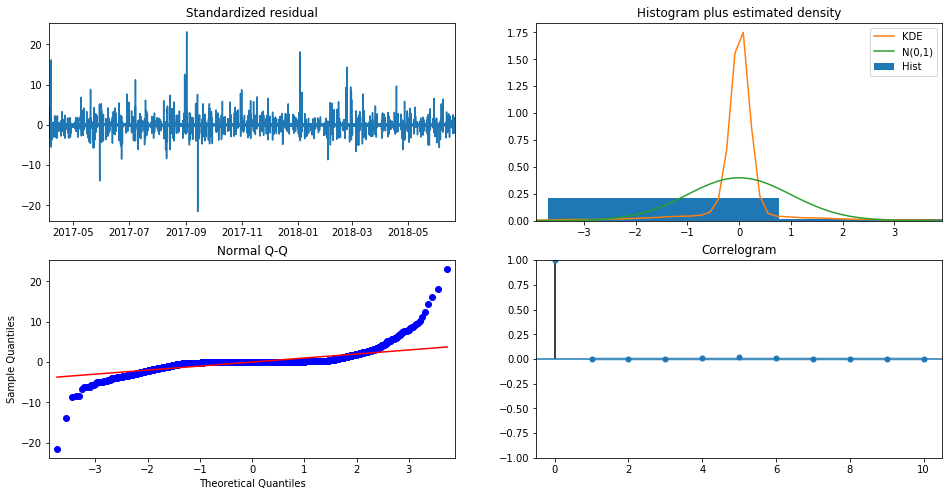

In [118]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

In [119]:
sp12.tail(50)

,close
datetime,
2018-06-19 14:00:00,1710.499167
2018-06-19 15:00:00,1727.493333
2018-06-19 16:00:00,1715.623171
2018-06-19 17:00:00,1715.623171
2018-06-19 18:00:00,1715.623171
2018-06-19 19:00:00,1715.623171
2018-06-19 20:00:00,1715.623171
2018-06-19 21:00:00,1715.623171
2018-06-19 22:00:00,1715.623171


In [ ]:
# pred = results.get_prediction(start=pd.to_datetime('2018-05-11 00:00:00'), dynamic=False)
# pred_ci = pred.conf_int()


# ax = sp28['2017':].plot(label='observed')
# pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
# ax.fill_between(pred_ci.index,
#                 pred_ci.iloc[:, 0],
#                 pred_ci.iloc[:, 1], color='k', alpha=.2)
# ax.set_xlabel('Date')
# ax.set_ylabel('Furniture Sales')
# plt.legend()
# plt.show()

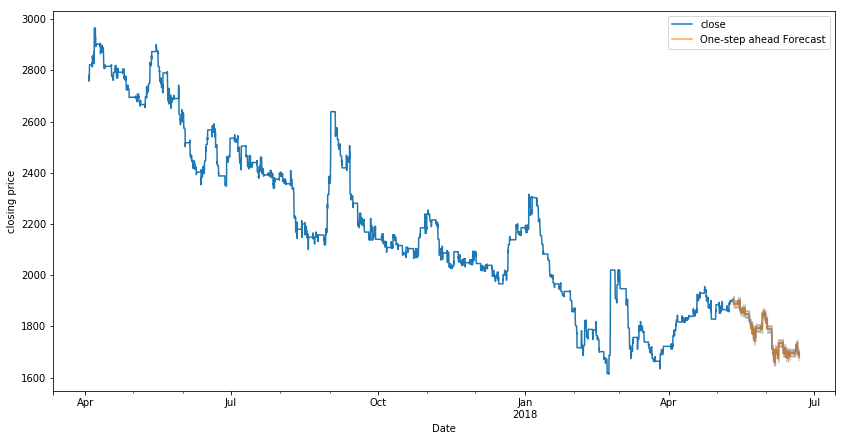

In [120]:
pred = results.get_prediction(start=pd.to_datetime('2018-05-11 00:00:00'), dynamic=False)
pred_ci = pred.conf_int()


ax = sp12['2017':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('closing price')
plt.legend()
plt.show()

In [121]:
sp29 = sp1[sp1['isin'] == 'INE492A01029'][['datetime','close']].set_index('datetime')

In [122]:
sp29 = sp29.resample('60min').mean()
sp29.bfill(inplace=True)

In [123]:
sp29.index

DatetimeIndex(['2017-04-03 09:00:00', '2017-04-03 10:00:00',
               '2017-04-03 11:00:00', '2017-04-03 12:00:00',
               '2017-04-03 13:00:00', '2017-04-03 14:00:00',
               '2017-04-03 15:00:00', '2017-04-03 16:00:00',
               '2017-04-03 17:00:00', '2017-04-03 18:00:00',
               ...
               '2018-05-17 06:00:00', '2018-05-17 07:00:00',
               '2018-05-17 08:00:00', '2018-05-17 09:00:00',
               '2018-05-17 10:00:00', '2018-05-17 11:00:00',
               '2018-05-17 12:00:00', '2018-05-17 13:00:00',
               '2018-05-17 14:00:00', '2018-05-17 15:00:00'],
              dtype='datetime64[ns]', name='datetime', length=9823, freq='60T')

In [124]:
sp29.shape,sp16.isna().sum()

((9823, 1), close    0
 dtype: int64)

In [125]:
sp29.head()

,close
datetime,
2017-04-03 09:00:00,720.603333
2017-04-03 10:00:00,717.457500
2017-04-03 11:00:00,713.384167
2017-04-03 12:00:00,713.593333
2017-04-03 13:00:00,714.863333


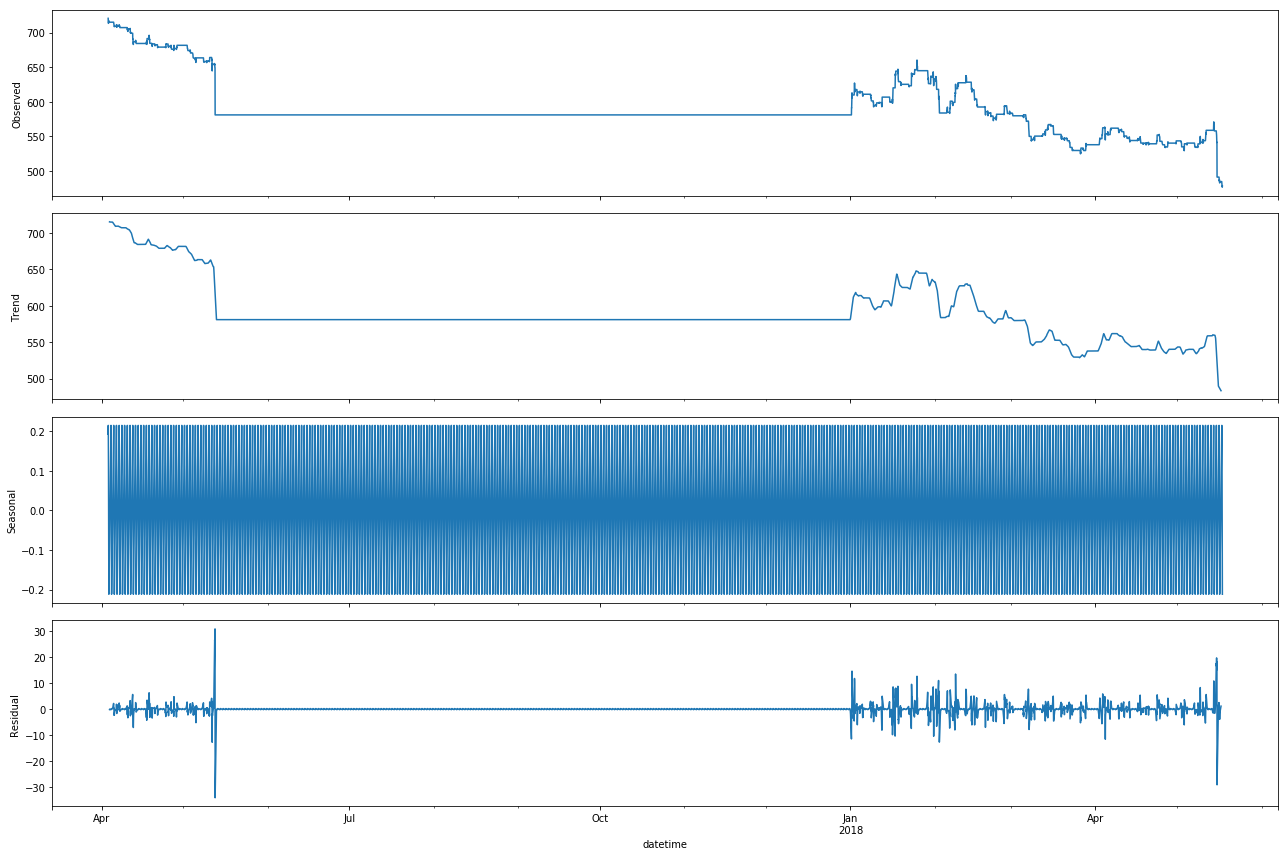

In [126]:
import statsmodels.api as sm
from pylab import rcParams
import matplotlib.pyplot as plt

rcParams['figure.figsize'] = 18, 12
decomposition = sm.tsa.seasonal_decompose(sp29, model='additive')
fig = decomposition.plot()
plt.show()

In [127]:
import warnings
import itertools

p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [128]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(sp12,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

C:\Users\sharath_shady\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\representation.py:375: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return matrix[[slice(None)]*(matrix.ndim-1) + [0]]


ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:194268.91314386457
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:186127.61987065943
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:100470.04144675015
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:100331.7515523136
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:100455.9122020482
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:100428.15664258962
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:100337.23048845725
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:100290.34544002391
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:186269.75608235583
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:164820.23398102896
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:90036.61249574619
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:89884.6975482572
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:90038.26987934149


C:\Users\sharath_shady\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:90305.8857312584
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:89896.2340667937
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:89870.84986455814
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:71595.43272887569
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:71458.11001023388
ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:78870.19725064147
ARIMA(0, 1, 0)x(0, 1, 1, 12)12 - AIC:71435.0010576551
ARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:71463.81989912076
ARIMA(0, 1, 0)x(1, 0, 1, 12)12 - AIC:71460.11013990041
ARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:75503.9651703758
ARIMA(0, 1, 0)x(1, 1, 1, 12)12 - AIC:71415.47801532502
ARIMA(0, 1, 1)x(0, 0, 0, 12)12 - AIC:71466.46089577334
ARIMA(0, 1, 1)x(0, 0, 1, 12)12 - AIC:71327.760952833
ARIMA(0, 1, 1)x(0, 1, 0, 12)12 - AIC:78739.74765961137
ARIMA(0, 1, 1)x(0, 1, 1, 12)12 - AIC:71305.36407159964
ARIMA(0, 1, 1)x(1, 0, 0, 12)12 - AIC:71339.15704648498
ARIMA(0, 1, 1)x(1, 0, 1, 12)12 - AIC:71329.76108646476
ARIMA(0, 1, 1)x(1, 1, 0, 12)12 - AIC:75397.05927932367
ARIMA(0, 1, 1)x(

C:\Users\sharath_shady\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 0)x(0, 0, 1, 12)12 - AIC:71490.88889914405


C:\Users\sharath_shady\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 0)x(0, 1, 0, 12)12 - AIC:78523.44545619877
ARIMA(1, 0, 0)x(0, 1, 1, 12)12 - AIC:71442.70321975937
ARIMA(1, 0, 0)x(1, 0, 0, 12)12 - AIC:71462.62668109204
ARIMA(1, 0, 0)x(1, 0, 1, 12)12 - AIC:71557.58975099624
ARIMA(1, 0, 0)x(1, 1, 0, 12)12 - AIC:75306.40298767833
ARIMA(1, 0, 0)x(1, 1, 1, 12)12 - AIC:71426.4492288812


C:\Users\sharath_shady\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 1)x(0, 0, 0, 12)12 - AIC:71471.9507536103


C:\Users\sharath_shady\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 1)x(0, 0, 1, 12)12 - AIC:71388.14438801864
ARIMA(1, 0, 1)x(0, 1, 0, 12)12 - AIC:78304.6792264673
ARIMA(1, 0, 1)x(0, 1, 1, 12)12 - AIC:71311.40495637734
ARIMA(1, 0, 1)x(1, 0, 0, 12)12 - AIC:71338.44166270859
ARIMA(1, 0, 1)x(1, 0, 1, 12)12 - AIC:71354.90213404737
ARIMA(1, 0, 1)x(1, 1, 0, 12)12 - AIC:75155.7739511549
ARIMA(1, 0, 1)x(1, 1, 1, 12)12 - AIC:71295.20307432715
ARIMA(1, 1, 0)x(0, 0, 0, 12)12 - AIC:71474.52223697487
ARIMA(1, 1, 0)x(0, 0, 1, 12)12 - AIC:71335.93794358392
ARIMA(1, 1, 0)x(0, 1, 0, 12)12 - AIC:78748.57700753068
ARIMA(1, 1, 0)x(0, 1, 1, 12)12 - AIC:71313.55050952984
ARIMA(1, 1, 0)x(1, 0, 0, 12)12 - AIC:71335.93803752268
ARIMA(1, 1, 0)x(1, 0, 1, 12)12 - AIC:71337.93806830993
ARIMA(1, 1, 0)x(1, 1, 0, 12)12 - AIC:75391.89813683362
ARIMA(1, 1, 0)x(1, 1, 1, 12)12 - AIC:71291.64552977114
ARIMA(1, 1, 1)x(0, 0, 0, 12)12 - AIC:71468.36197994702
ARIMA(1, 1, 1)x(0, 0, 1, 12)12 - AIC:71329.57435494837
ARIMA(1, 1, 1)x(0, 1, 0, 12)12 - AIC:78741.58331114543
ARIMA(1, 1, 

In [129]:
mod = sm.tsa.statespace.SARIMAX(sp12,
                                order=(1, 1, 1),
                                seasonal_order=(0, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0265      0.043     -0.615      0.539      -0.111       0.058
ma.L1          0.1345      0.044      3.091      0.002       0.049       0.220
ma.S.L12      -1.0000      0.492     -2.033      0.042      -1.964      -0.036
sigma2        47.4111     23.338      2.032      0.042       1.670      93.152


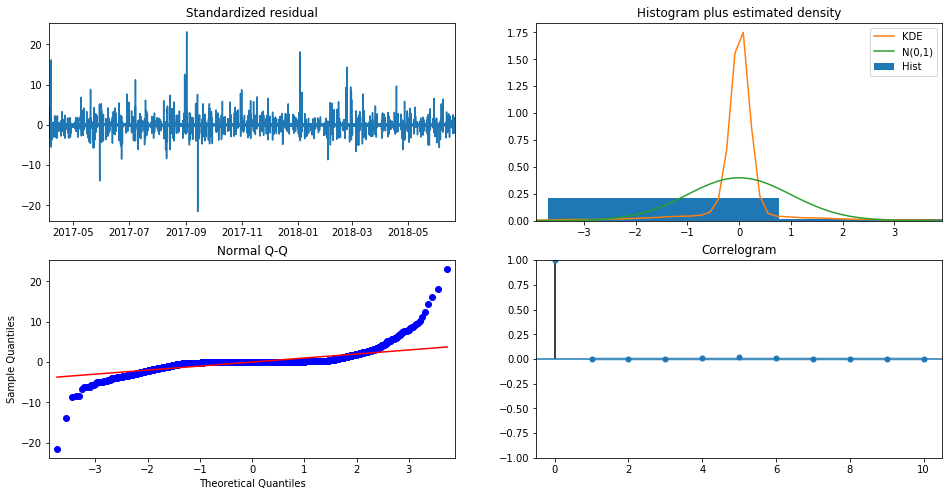

In [130]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

In [131]:
sp12.tail(50)

,close
datetime,
2018-06-19 14:00:00,1710.499167
2018-06-19 15:00:00,1727.493333
2018-06-19 16:00:00,1715.623171
2018-06-19 17:00:00,1715.623171
2018-06-19 18:00:00,1715.623171
2018-06-19 19:00:00,1715.623171
2018-06-19 20:00:00,1715.623171
2018-06-19 21:00:00,1715.623171
2018-06-19 22:00:00,1715.623171


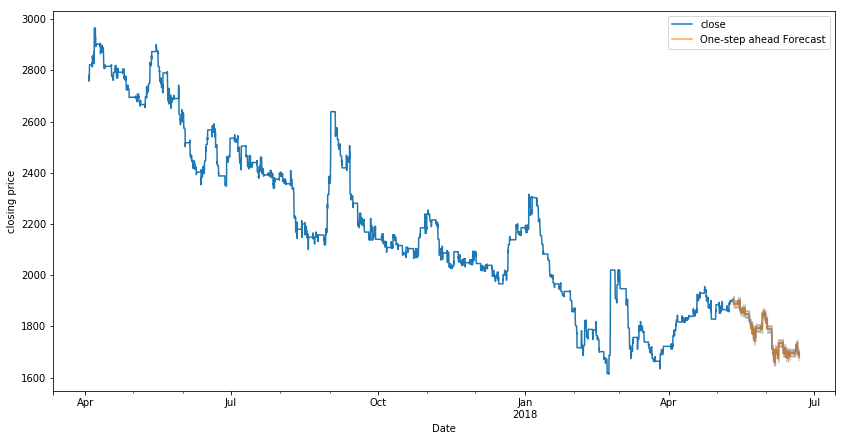

In [132]:
pred = results.get_prediction(start=pd.to_datetime('2018-05-11 00:00:00'), dynamic=False)
pred_ci = pred.conf_int()


ax = sp12['2017':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('closing price')
plt.legend()
plt.show()